# Part 1 - Theory
### a)
Clearly, it suffices to show that for some $\xi \in (-h,h)$, this equality holds:
$$ \frac{f(h)-f(-h)}{2h} - f'(0) = \frac{h^2}{6} f'''(\xi) $$
Since $f \in C^3$, we can use Taylor's theorem for the third derivative which states that there exists a real number $\xi \in (-h,h)$ such that the following holds:
$$ f(x+h) - f(x) = f'(x)h - \frac{1}{2}f''(x)h^2 + \frac{1}{6}f'''(\xi)h^3$$
Apply this for $x = 0$ with $h= \pm h$ and  to obtain these equations.
$$ \begin{align*}
f(h) - f'(0)h &= f(0) +\frac{1}{2}f''(0)h^2 + \frac{1}{6}f'''(\xi_1)h^3 &&\text{for } \xi_1 \in (0,h) \\
f(-h) + f'(0)h &= f(0) + \frac{1}{2}f''(0)h^2 - \frac{1}{6}f'''(\xi_2)h^3 &&\text{for } \xi_2 \in (-h,0)
\end{align*}$$
We use them in the following derivation:
$$ \begin{align*}
    \frac{f(h)-f(-h)}{2h} - f'(0) &= \frac{f(h)- f'(0)h - (f(-h)+f'(0)h)}{2h}\\
    &= \frac{f(0) +\frac{1}{2}f''(0)h^2 + \frac{1}{6}f'''(\xi_1)h^3 - f(0) - \frac{1}{2}f''(0)h^2 + \frac{1}{6}f'''(\xi_2)h^3}{2h}\\
    &= \frac{\frac{1}{6}(f'''(\xi_1)+f'''(\xi_2))h^3}{2h}\\
    &= \frac{h^2}{6}\frac{(f'''(\xi_1)+f'''(\xi_2))}{2}\\
    &= \frac{h^2}{6}f'''(\xi)
\end{align*}$$
On the last step, we have $\xi \in (-h,h)$ because by the IVT (which holds since $f'''$ is continuous), we can find such $\xi \in (\xi_2, \xi_1)$.
### b)
Clearly, we only need to show $$\frac{\delta f(h) - \delta f(-h)}{2h} \leq \frac{\varepsilon}{h}$$ and this follows from the fact that $|\delta f(h)| \leq \varepsilon$ and $|\delta f(-h)| \leq \varepsilon$ with the triangle inequality.

We plot $B(h)$ for $\varepsilon = 0.01$, $M = 0.5$ and $h$ between $0.01$ and $1$, so that we can see the shape of the function.

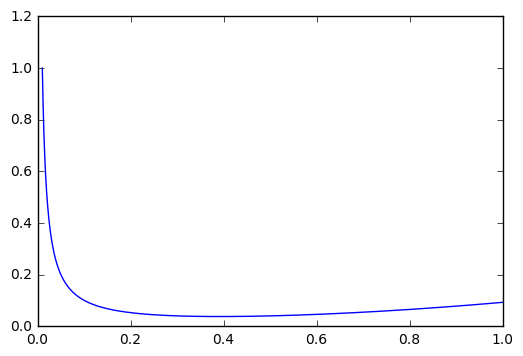

In [71]:
import numpy as np
import matplotlib.pyplot as plt

a, eps, M = 1, 0.01, 0.5
def B(h):
    return eps/h + M*h*h/6

x = np.linspace(0.01, a, 2000) #
y = list(map(B,x))
plt.plot(x,y, color='blue')
plt.show()

We see from the graph that taking a small $h$ increases the upper bound for the error, so we will not be sure that the difference $D_h - f'(0)$ is smalle. In order to find the best value for $B$, we find the roots of the derivative of $B$.
$$ \begin{align*}
    \frac{d}{dx}\left(\frac{\varepsilon}{h} + \frac{Mh^2}{6}\right) &=0\\
    -\frac{\varepsilon}{h^2} + \frac{Mh}{3} &= 0\\
    -\varepsilon + \frac{Mh^3}{3} &= 0\\
    h &= \sqrt[3]{\frac{3\varepsilon}{M}}
\end{align*}$$

# Part 2 - Lab
In order to demonstrate Runge's phenomenon, we chose to approximate the function $f(x) = \frac{e^{-4x^2}}{1+4x^2}$ using the Lagrange interpolation method, with equidistant and Chebyshev nodes, as well as the Bernstein polynomials. On all of these methods, we use 8 points for the interpolation. For the Lagrange with equidistant nodes, we can clearly observe the oscillations on the left and right ends of the graph which do not correspond to the shape of the function. Using the Chebyshev nodes, we observe a slight improvement (especially looking at the range of $y$ that is smaller), but this approximation is still really far from the function outside of the range of the interpolation nodes. On the last graph, we see that the Bernstein polynomials make a slightly worse approximation of the fonction in the interpolation range but there is less oscillation near the extremities of the range.

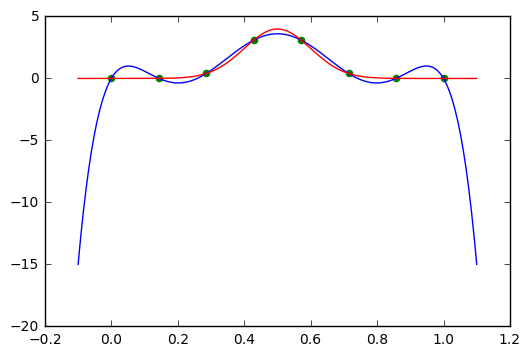

In [201]:
## - Defining helper functions - ##
def fct(x): # this is the function f we chose
    return np.log(1/(1+1/20*(x+0.5)*(x+0.5)))
    #return np.sin(np.exp(-4*x*x)/(1+4*x*x))
from scipy.stats import norm
rv = norm(loc=0.5, scale=0.1)
fct = rv.pdf

def evalPoly(a, x):
    # evaluates a polynomial defined with its coefficients at x
    return sum([a[i]*pow(x,i) for i in range(len(a))])

## - a) Lagrange Interpolation - ##
def lagrange(x, y):
    # Uses the Vandermonde matrix to find the coefficients
    # a_i of the Lagrange polynomial for the interpolation problem
    # with data x and y.
    vmonde = np.zeros((len(x), len(x))) # initialize matrix with zeros
    for i in range(len(vmonde)): 
        for j in range(len(vmonde)):
            vmonde[i,j] = pow(x[i], j) #put x_i^j in (i,j) coordinate
    
    return np.linalg.solve(vmonde, y) # solve the system Ma = y returning the coefficients a

x = np.linspace(0,1,8)
y = list(map(fct,x))
coeffs = lagrange(x,y)
xlist = np.linspace(-0.1, 1.1, 300)
ylist = [evalPoly(coeffs, x) for x in xlist]
plt.plot(xlist, ylist, color='blue')
ylist = list(map(fct,xlist))
plt.plot(xlist,ylist,color='red')
ylist = list(map(fct,x))
plt.scatter(x,y,color='green')
plt.show()

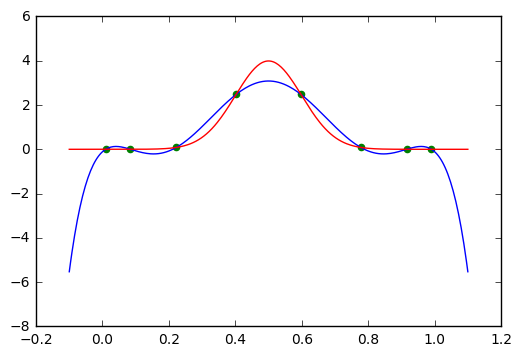

In [200]:
## - b) Chebyshev nodes - ##
import math
def binomial(n,j):
    return math.factorial(n)/(math.factorial(j)*math.factorial(n-j))

def cheb(lower, upper, n):
    # gives the Chebyshev nodes.
    return [0.5*(lower+upper) + 0.5*(upper-lower)*np.cos((2*i-1)*np.pi/(2*n)) for i in range(1,n+1)]

x = cheb(0,1,8)
y = list(map(fct,x))
coeffs = lagrange(x,y)
xlist = np.linspace(-0.1, 1.1, 300)
ylist = [evalPoly(coeffs, x) for x in xlist]
plt.plot(xlist, ylist, color='blue')
ylist = list(map(fct,xlist))
plt.plot(xlist,ylist,color='red')
ylist = list(map(fct,x))
plt.scatter(x,y,color='green')
plt.show()

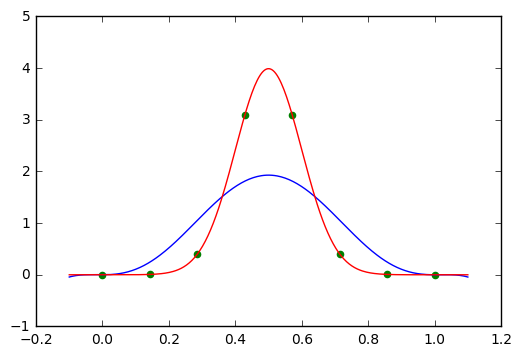

In [199]:
## - c) Bernstein polynomials - ##
def evalPolyPrime(a, x):
    # New function to evaluate polynomials but we write p = sum a_i x^i(1-x)^i
    return sum([a[i]*pow(x,i)*pow(1-x,len(a)-1-i) for i in range(len(a))])

def bernstein(f,n):
    # defines the Berstein polynomials (represented with coefficients as above)
    # the parameters are the function and the number of nodes
    return [f(j/n)*binomial(n,j) for j in range(0,n+1)]

x = np.linspace(0,1,8)
y = list(map(fct,x))
coeffs = bernstein(fct, 8)
xlist = np.linspace(-0.1, 1.1, 300)
ylist = [evalPolyPrime(coeffs, x) for x in xlist]
plt.plot(xlist, ylist, color='blue')
ylist = list(map(fct,xlist))
plt.plot(xlist,ylist,color='red')
ylist = list(map(fct,x))
plt.scatter(x,y,color='green')
plt.show()